In [11]:
import pandas as pd
import os
ROOT_DIR = "HDR-anomaly-challenge-sample"
butterfly_train = pd.read_csv(os.path.join(ROOT_DIR, "files/butterfly_anomaly_train.csv"), sep = ",",
                             index_col = 0)
subspecies = butterfly_train["subspecies"].value_counts(dropna=False)
subspecies[subspecies.index.sort_values()]

subspecies
0.0      21
1.0      48
2.0     489
3.0      77
4.0      16
5.0      23
6.0       2
7.0      98
8.0     856
9.0     201
10.0      8
11.0     67
12.0      2
13.0     83
NaN      91
Name: count, dtype: int64

In [2]:
butterfly_train["parent_subspecies_1"].unique(),\
butterfly_train["parent_subspecies_2"].unique()

(array([ 8., nan]), array([ 9., nan]))

In [3]:
length = 224 
width = (224/2) 
nbytes_per_pixel = 1 
channels = 1 
batch_size = 1
f"{length * width * nbytes_per_pixel * channels * batch_size} bytes per batch"

'25088.0 bytes per batch'

Displaying images from data

In [19]:
from PIL import Image
import os 
actual_filenames = butterfly_train[["hybrid_stat", "filename"]].apply(
    lambda x: os.path.abspath(os.path.join(
        ROOT_DIR, "input_data/_downsized", x["hybrid_stat"], x["filename"]
    )), axis = 1)

35


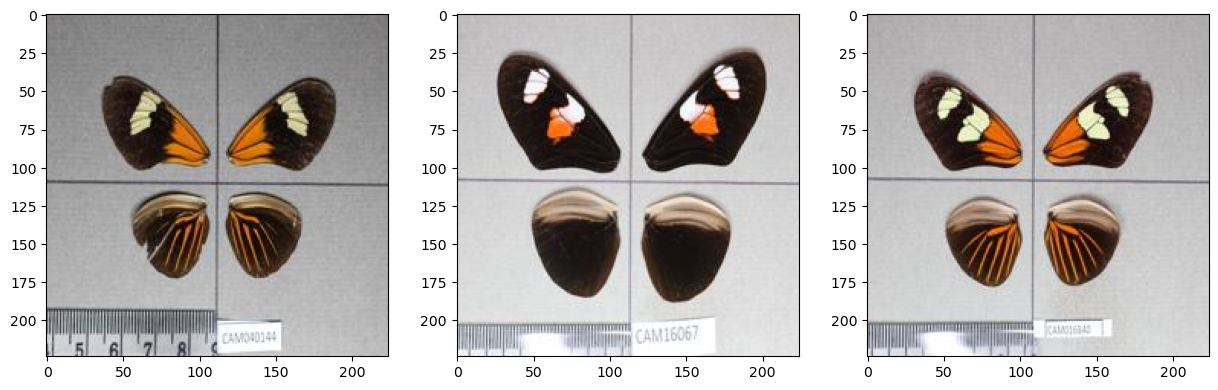

In [48]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
subspec_9 = actual_filenames[butterfly_train["subspecies"] == 9]
subspec_8 = actual_filenames[butterfly_train["subspecies"] == 8]
hybrid = actual_filenames[butterfly_train["hybrid_stat"] == "hybrid"]
fig, ax = plt.subplots(1,3)
fig.set_figwidth(15)
index = np.random.randint(hybrid.index.size)
print(index)
ax[0].imshow(Image.open(subspec_8.iloc[index]).convert("RGB"))
ax[1].imshow(Image.open(subspec_9.iloc[index]).convert("RGB"))
ax[2].imshow(Image.open(hybrid.iloc[index]).convert("RGB"))
plt.show()

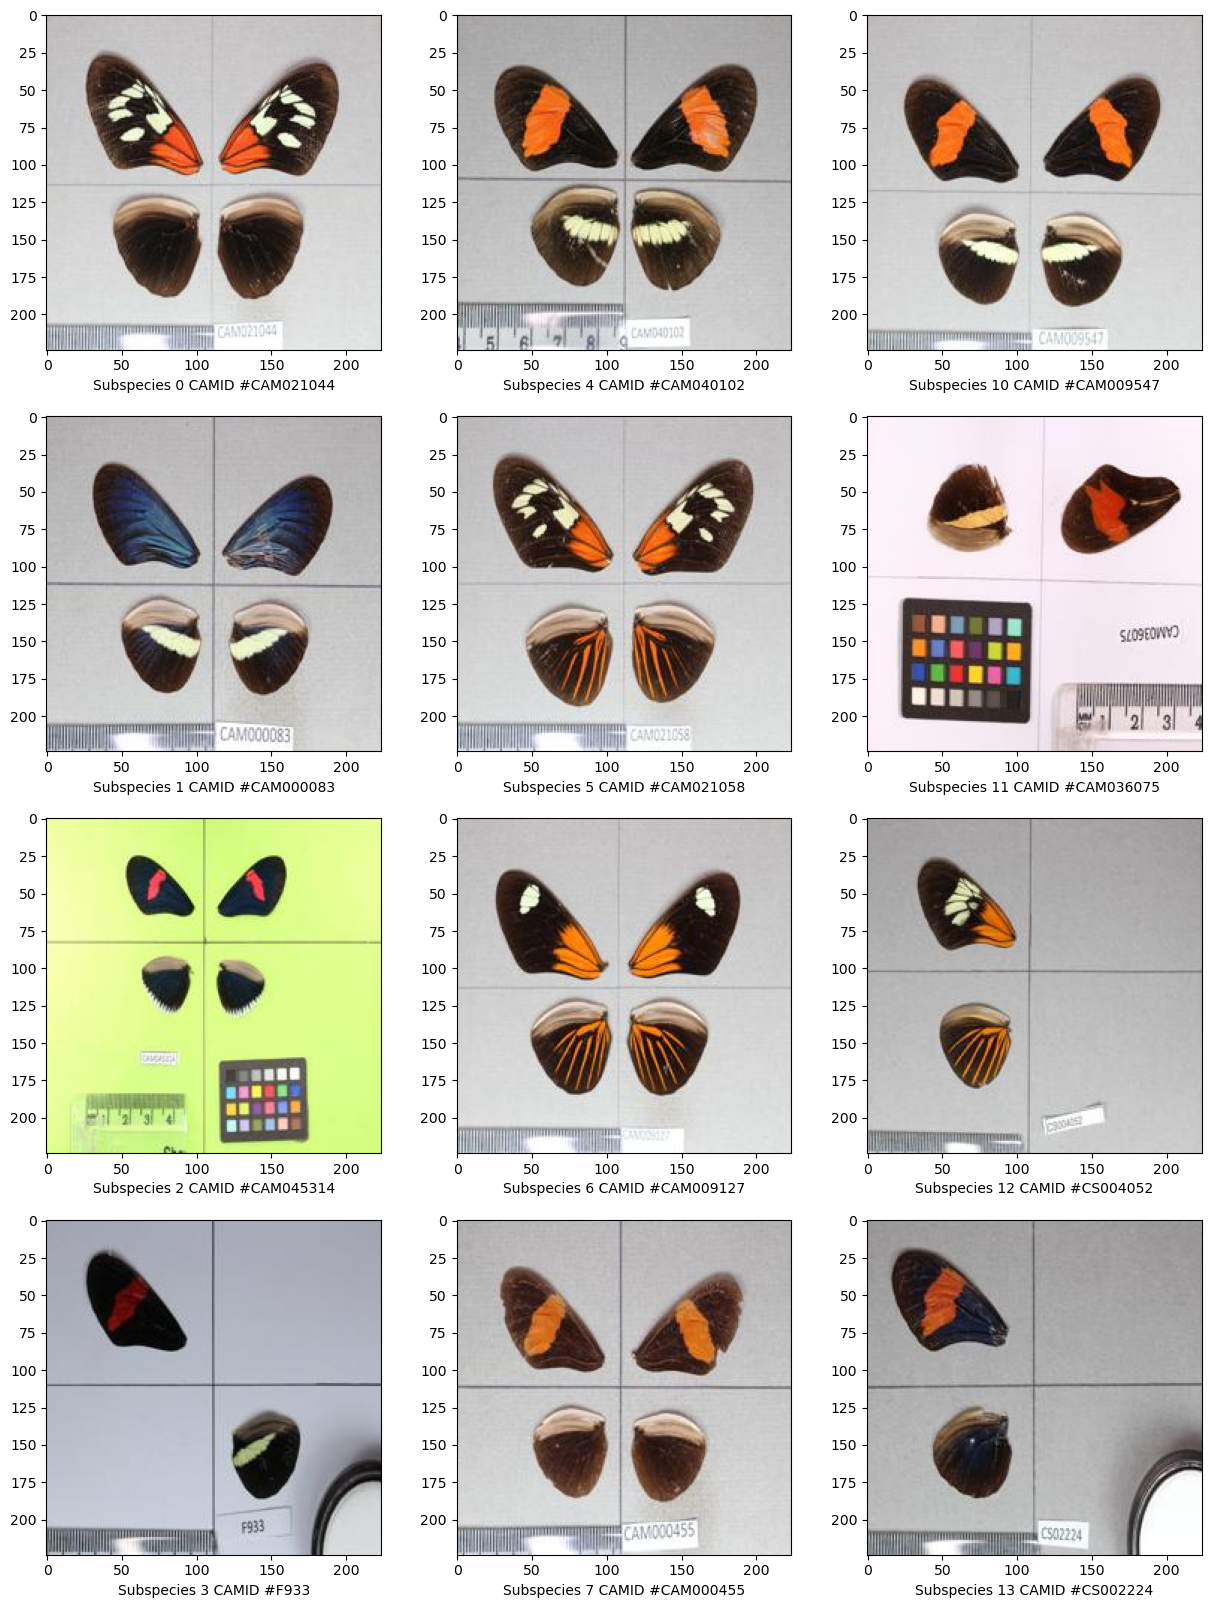

In [74]:
fig, ax = plt.subplots(4,3)
fig.set_figwidth(15)
fig.set_figheight(20)
other_subspecies = [0,1,2,3,4,5,6,7,10,11,12,13] #all but the signal hybrid parents
for i in range(len(other_subspecies)):
    #for this subspecies
    subspec_id = other_subspecies[i]
    sample = actual_filenames[butterfly_train['subspecies'] == subspec_id].sample(1)
    camid = sample.index.item()
    url = sample.item()
    #select a random example
    img = Image.open(url).convert("CMYK")
    #add to plot
    ax[i % 4][i // 4].imshow(img)
    ax[i % 4][i // 4].set_xlabel(f"Subspecies {subspec_id} CAMID #{camid}")
#show
plt.show()

In [83]:
from torchvision import transforms
#img got transformed to CMYK, so its shape is now 4,224,224
transforms.ToTensor()(img),\
transforms.ToTensor()(img).shape

(tensor([[[0.3922, 0.3922, 0.3922,  ..., 0.4118, 0.4118, 0.4118],
          [0.3961, 0.3961, 0.3961,  ..., 0.4039, 0.3961, 0.3882],
          [0.4039, 0.4039, 0.4000,  ..., 0.4000, 0.3882, 0.3765],
          ...,
          [0.4431, 0.5059, 0.4784,  ..., 0.0000, 0.0000, 0.0000],
          [0.4196, 0.5137, 0.4902,  ..., 0.0000, 0.0000, 0.0000],
          [0.3961, 0.5216, 0.5059,  ..., 0.0000, 0.0000, 0.0000]],
 
         [[0.4000, 0.4000, 0.4000,  ..., 0.4196, 0.4196, 0.4196],
          [0.4039, 0.4039, 0.4039,  ..., 0.4118, 0.4039, 0.3961],
          [0.4118, 0.4118, 0.4078,  ..., 0.4078, 0.3961, 0.3843],
          ...,
          [0.4157, 0.4784, 0.4510,  ..., 0.0000, 0.0000, 0.0000],
          [0.3922, 0.4863, 0.4627,  ..., 0.0000, 0.0000, 0.0000],
          [0.3686, 0.4941, 0.4784,  ..., 0.0000, 0.0000, 0.0000]],
 
         [[0.3961, 0.3961, 0.3961,  ..., 0.4157, 0.4157, 0.4157],
          [0.4000, 0.4000, 0.4000,  ..., 0.4078, 0.4000, 0.3922],
          [0.4078, 0.4078, 0.4039,  ...,